In [ ]:
Answer2

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Path to the directory containing policy CSV files
policy_dir_path = 'policy_data/policy/'

In [3]:
# Initialize an empty DataFrame to store all policy data
all_policy_data = pd.DataFrame()

In [4]:
# Iterate over each file in the policy directory
for file in os.listdir(policy_dir_path):
    if file.endswith('.csv'):
        file_path = os.path.join(policy_dir_path, file)
        state_policy_data = pd.read_csv(file_path)
        state_policy_data['State'] = file.replace('_policy.csv', '')  # Add a column for the state name
        all_policy_data = pd.concat([all_policy_data, state_policy_data], ignore_index=True)

In [5]:
# Count the number of non-null entries for each policy type by state
policy_counts = all_policy_data.drop(columns=['date', 'policy']).apply(pd.notnull)
policy_counts['State'] = all_policy_data['State']
state_policy_summary = policy_counts.groupby('State').sum()

In [6]:
# Calculate the IQR and identify outliers for each policy type
outliers = {}
for column in state_policy_summary.columns:
    Q1 = state_policy_summary[column].quantile(0.25)
    Q3 = state_policy_summary[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = state_policy_summary[(state_policy_summary[column] < lower_bound) | 
                                            (state_policy_summary[column] > upper_bound)].index.tolist()

In [7]:
# Replace 'Restrict/Close' with any policy type of interest
policy_type = 'Restrict/Close'
data_to_plot = state_policy_summary[policy_type].reset_index()
data_to_plot['Outlier'] = data_to_plot['State'].apply(lambda x: 'Outlier' if x in outliers[policy_type] else 'Normal')

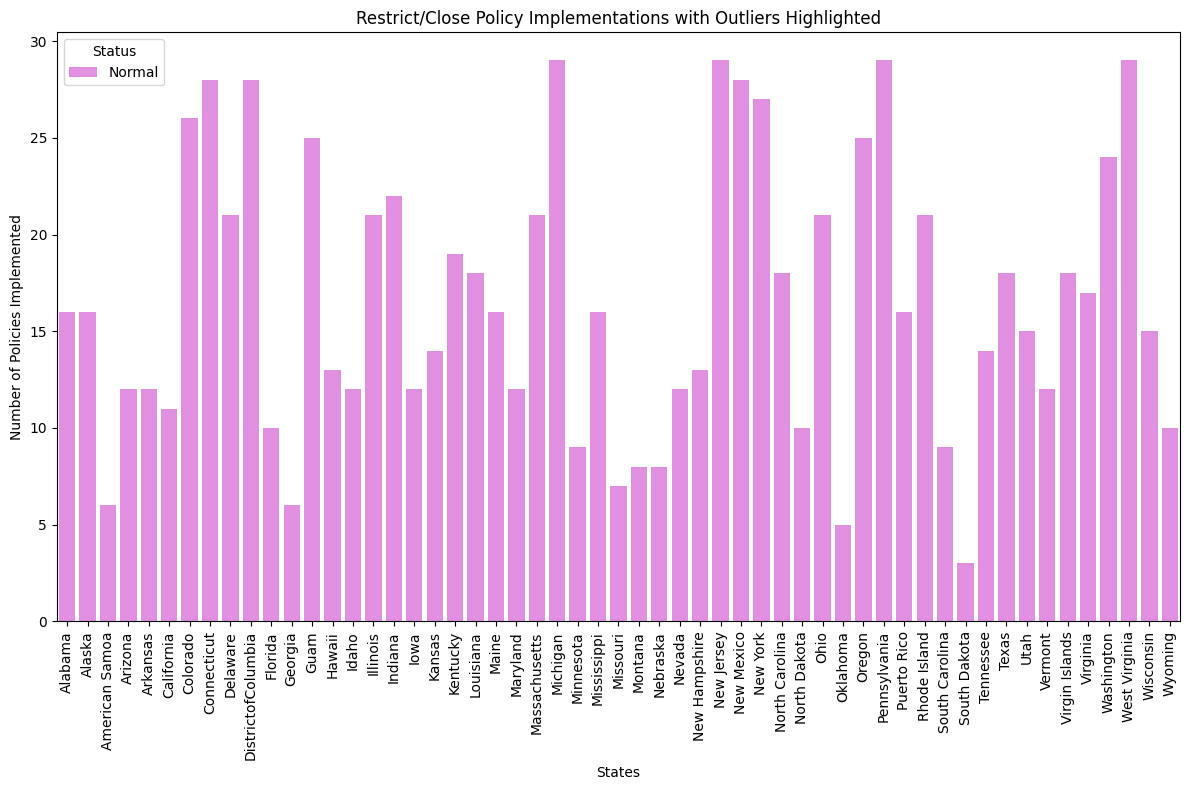

In [8]:
# Plotting the results for one of the policy types for demonstration
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y=policy_type, hue='Outlier', data=data_to_plot, palette={'Normal': 'violet', 'Outlier': 'magenta'})
plt.xticks(rotation=90)
plt.title(f'{policy_type} Policy Implementations with Outliers Highlighted')
plt.ylabel('Number of Policies Implemented')
plt.xlabel('States')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

In [ ]:
The bar chart visualizes the number of Restrict/Close policy implementations across various U.S. states and territories. 

1. Variation in Policy Implementation:
   - There is a clear variation in the number of policies implemented across different regions, indicating that the response to the pandemic 
varied widely from one state to another.
   - This may reflect differences in the severity of outbreaks, political decisions, public health strategies, or other local factors.

2. Policy Implementation Outliers:
   - Some states are highlighted as outliers, meaning they have implemented this type of policy significantly more or less than the median state.
   - Outlier states may warrant further investigation to understand the reasons behind their higher or lower numbers. 
For example, a state with an unusually high number may have faced more severe COVID-19 conditions or been more aggressive in its public 
health response.

3. Comparison of Policy Focus:
   - Comparing the frequency of 'Restrict/Close' policies could indicate how focused states were on closing or restricting access to certain services,
areas, or functions as a response to the pandemic.
   - States with more of these policies might have aimed to contain the spread of the virus through more stringent measures.

4. Policy Count Interpretation:
   - It is important not to equate the number of policies directly with effectiveness without additional context. More policies do not necessarily 
mean better outcomes, as the effectiveness of the policies and adherence to them also play critical roles.

5. Data-Driven Decisions:
   - This visual representation can be used by policymakers and researchers to assess state-level responses, potentially guiding future decisions 
and responses in similar public health crises.
